# EDA 2


In [30]:
import pandas as pd
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/historico_tickets_limpio_pandas.csv", index_col = 0)
df.head(1)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio


**Nota: Igual que siempre, no nos vale solo con picar el código, queremos que nos incluyais las conclusiones que extraeis.**

Usad la librería sidetable para:

1. Explorar los valores nulos.

In [6]:
df.stb.missing()

# No hay ningún valor nulo.

,missing,total,percent
id_ticket,0,97386,0.0
fecha,0,97386,0.0
id_empleado,0,97386,0.0
id_agente,0,97386,0.0
categoría,0,97386,0.0
tipo,0,97386,0.0
severidad,0,97386,0.0
prioridad,0,97386,0.0
días_resolución,0,97386,0.0
satisfacción,0,97386,0.0


2. Explorad la columna de categoría y reportad los resultados solo para aquellas categorías que incluyan el 70% de los datos.

In [9]:
df.stb.freq(["categoría"], thresh = 70)

# Podemos ver que la mayoría de tickets están relacionados con Sistema y con Acceso/Login. 

,categoría,count,percent,cumulative_count,cumulative_percent
0,Sistema,38961,40.006777,38961,40.006777
1,Acceso/Login,29165,29.947836,68126,69.954614
2,others,29260,30.045386,97386,100.000000


3. Explorad la columna categoría en relación al tipo de problema, filtrando de nuevo por aquellas categorías que incluyan el 70% de los datos.

In [14]:
df.stb.freq(["categoría", "tipo"], thresh = 70)

# Podemos ver que la mayoría de problemas son de tipo Solicitud. 

,categoría,tipo,count,percent,cumulative_count,cumulative_percent
0,Sistema,Solicitud,29225,30.009447,29225,30.009447
1,Acceso/Login,Solicitud,21939,22.527879,51164,52.537326
2,Software,Solicitud,14618,15.010371,65782,67.547697
3,others,others,31604,32.452303,97386,100.000000


4. Haced los mismo para la columna tipo en relación a la columna semestre. En este caso filtrad y mostrad los datos que incluyan el 60% de los datos.

In [21]:
df.stb.freq(["tipo", "semestre"], thresh = 60)

# Solo aparece Solicitud para el segundo semestre porque de lo contrario ya suma más de 60%.

,tipo,semestre,count,percent,cumulative_count,cumulative_percent
0,Solicitud,2º semestre,37463,38.468568,37463,38.468568
1,others,others,59923,61.531432,97386,100.000000


5. Por último, realizad este análisis para la columna mes en relación a la columna tipo. Mostrad solo los resultados para las categorías que incluyan el 60% de los datos.

In [26]:
df.stb.freq(["tipo", "mes"], thresh = 60)

# Los datos parecen estar distribuidos más o menos igual. 

,tipo,mes,count,percent,cumulative_count,cumulative_percent
0,Solicitud,Octubre,6378,6.549196,6378,6.549196
1,Solicitud,Agosto,6360,6.530713,12738,13.079909
2,Solicitud,Diciembre,6305,6.474237,19043,19.554145
3,Solicitud,Noviembre,6192,6.358203,25235,25.912349
4,Solicitud,Marzo,6186,6.352042,31421,32.264391
5,Solicitud,Septiembre,6168,6.333559,37589,38.597950
6,Solicitud,Junio,6107,6.270922,43696,44.868872
7,Solicitud,Mayo,6078,6.241143,49774,51.110016
8,Solicitud,Julio,6060,6.222660,55834,57.332676
9,others,others,41552,42.667324,97386,100.000000


6. Vamos a hacer un pequeño análisis de los outliers que podamos encontrar en nuestro conjunto de datos. Para realizar esto deberemos:

    6.1. Quedarnos solo con la columnas que sean númericas en nuestro conjunto de datos.

    6.2. Realizar un box-plot para ver cual de ellas tiene outliers e interpretar como esto nos podría afectar a las conclusiones que extraigamos de nuestros datos.

In [29]:
df_num = df.select_dtypes("int64")
df_num.head(1)

# Ponemos solo int64 porque hemos comprobado previamente que no hay floats. 

,id_empleado,id_agente,días_resolución,satisfacción,año
0,1735,4,0,5,2016


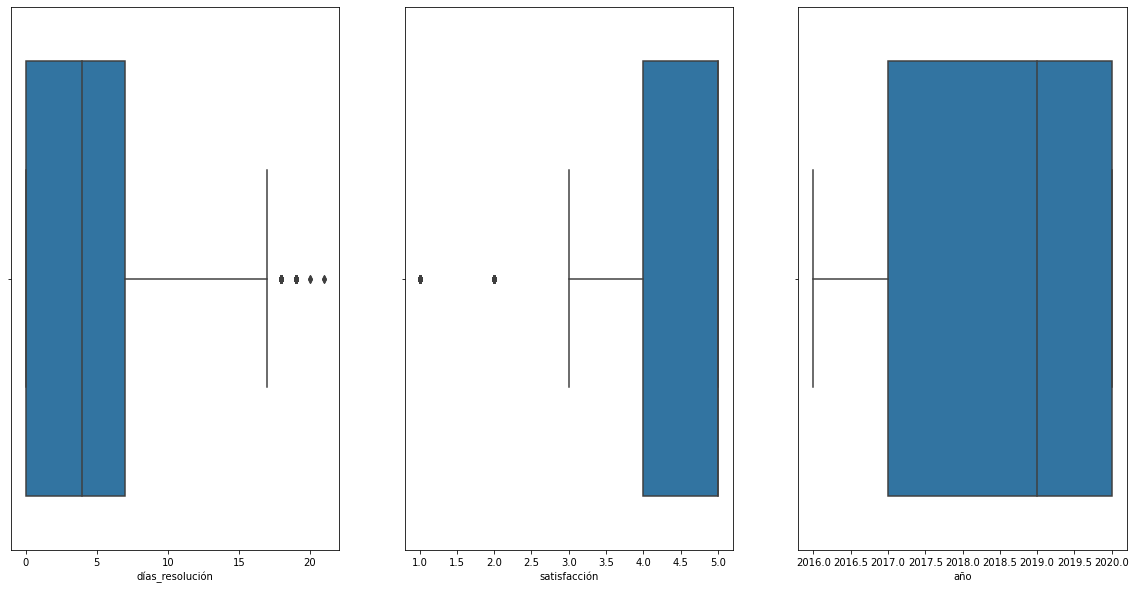

In [32]:
#Para realizar el boxplot, no vamos a tener en cuenta ni id_empleado ni id_agente porque no tiene sentido. 

fig, axes = plt.subplots(1, 3, figsize = (20,10))

sns.boxplot(x = "días_resolución", data = df_num, ax = axes[0])
sns.boxplot(x = "satisfacción", data = df_num, ax = axes[1])
sns.boxplot(x = "año", data = df_num, ax = axes[2]);



En cuanto a días de resolución, podemos ver que tenemos cuatro outliers de valores que están por encima de 16 días. El rango de días de resolución más frecuente está entre 0 días y 7 días, y la mediana está en 4 días. En cuanto a la satisfacción, podemos ver que hay outliers en 1 y 2, pero la mayoría de las valoraciones se encuentran entre 4 y 5. No hay outliers en año y la frecuencia entre 2017 y 2020.

#### Conclusiones

En relación a los valores nulos:

- Identificar las columnas que tienen nulos (lo hicimos en el ejercicio de pair programming EDA I y en el de hoy con el sidetable).

    - No hay ninguna columna que contenga nulos. 




- Debatid entre vosotras qué haríais con los valores nulos, ¿los quitaríais o los reemplazaríais con un valor que nosotras decidiremos?. Cread una celda de markdown en vuestro jupyter y escribid vuestras conclusiones.

    - En este caso no hay nulos. Si los hubiera, habría que mirar el caso concreto, el dato, cuántos hay... Para poder tomar una decisión de si quitarlos o dejarlos, ya que puede aportar información. Sólo reemplazaríamos por valores que decidiésemos en el caso de que pueda resultarnos de mayor utilidad de esa manera. En un principio no quitaríamos ningún dato, a no ser que una columna tuviera un porcentaje muy alto de nulos, aunque también puede considerarse no emplearla para el análisis. 
    